# DAT200 CA3 2022

Kaggle username: Arterx

### Imports

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Reading data

In [23]:
raw_data = pd.read_csv('train.csv') # Naming the train data "raw_data"
test_data = pd.read_csv('test.csv') # Naming the test data "test_data"

### Data exploration and visualisation

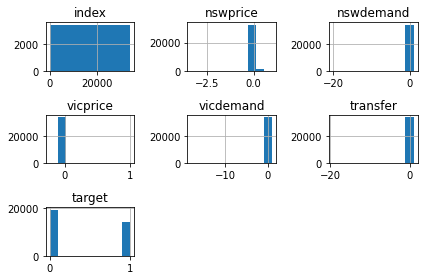

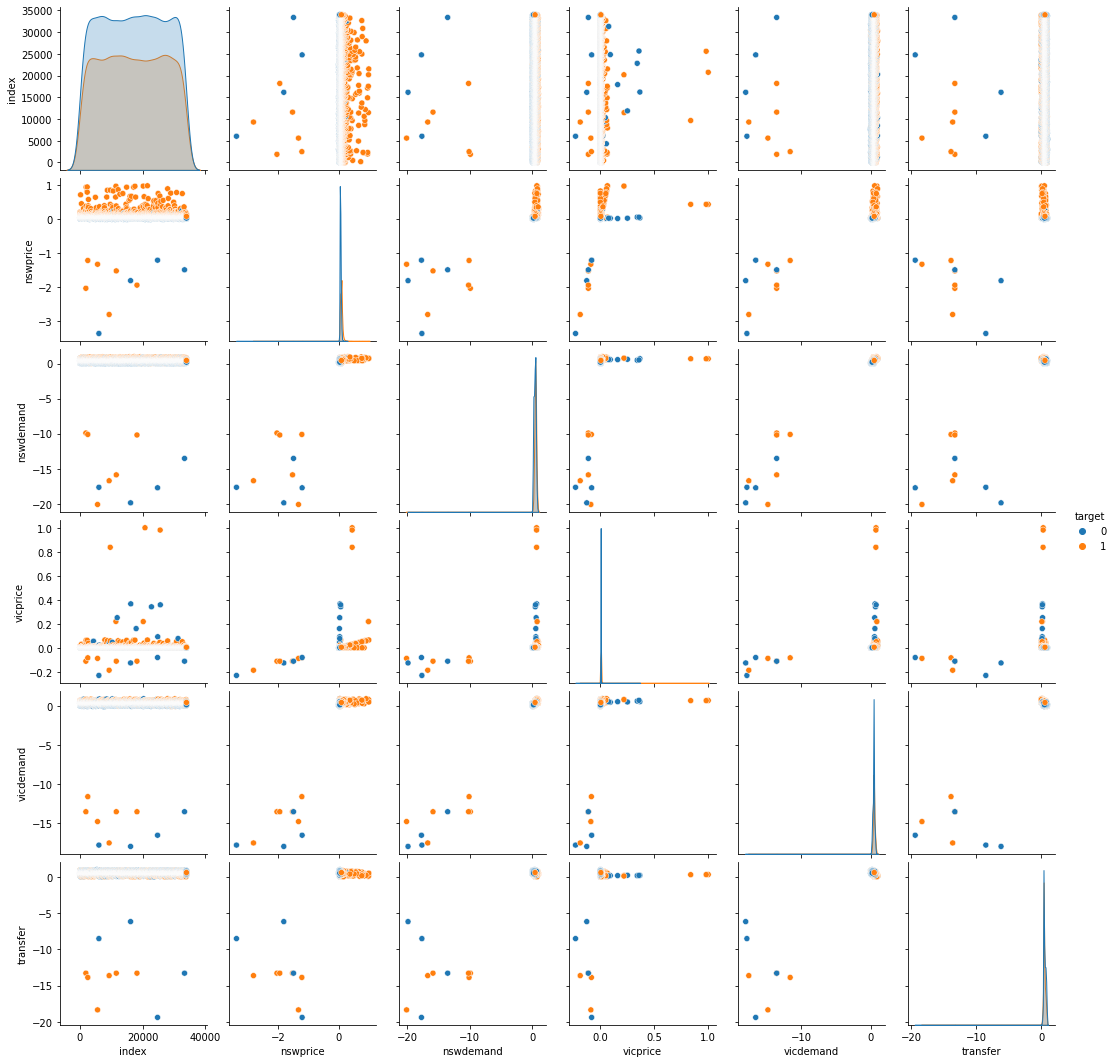

In [3]:
# Histograms below

raw_data.hist()
plt.tight_layout()
plt.show()

# Pairplots below
sns.pairplot(raw_data, hue='target')

In [4]:
raw_data.describe() # Descriptive stats

,index,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,33994.000000,33994.000000,33994.000000,33994.000000,33994.000000,33994.000000,33994.000000
mean,16996.500000,0.057260,0.422004,0.003422,0.418636,0.496951,0.424604
std,9813.366862,0.052392,0.319866,0.010215,0.293709,0.288964,0.494290
min,0.000000,-3.354880,-20.103552,-0.229600,-17.996896,-19.382464,0.000000
25%,8498.250000,0.035127,0.310213,0.002277,0.373123,0.414912,0.000000
50%,16996.500000,0.048667,0.444808,0.003467,0.422915,0.414912,0.000000
75%,25494.750000,0.074306,0.537303,0.003467,0.468863,0.605702,1.000000
max,33993.000000,0.979975,0.980809,1.000000,1.000000,1.000000,1.000000


### Data cleaning

In [50]:
# Using Z-scores to filter out the outliers. Z-score < 2 is 95% of the data

z_scores = stats.zscore(raw_data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2).all(axis=1)

# outliers = (abs_z_scores >= 2).all(axis=1) Was used with the IterativeImputer but did not prove useful

data = raw_data[filtered_entries]

In [51]:
data.describe() # Descriptive stats

,index,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,33642.000000,33642.000000,33642.000000,33642.000000,33642.000000,33642.000000,33642.000000
mean,16996.972148,0.055558,0.424460,0.003218,0.421993,0.501606,0.419268
std,9812.622196,0.025612,0.162032,0.001326,0.119613,0.153075,0.493447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8499.250000,0.034947,0.308688,0.002270,0.371828,0.414912,0.000000
50%,16999.500000,0.048367,0.443023,0.003467,0.422915,0.414912,0.000000
75%,25489.750000,0.073316,0.535406,0.003467,0.467115,0.606579,1.000000
max,33993.000000,0.161643,0.948974,0.022781,0.991196,1.000000,1.000000


### Data exploration after cleaning

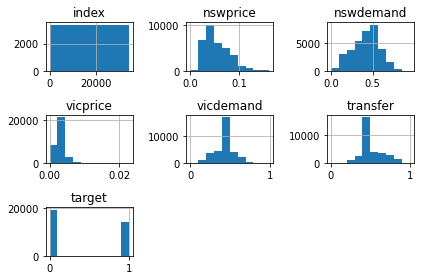

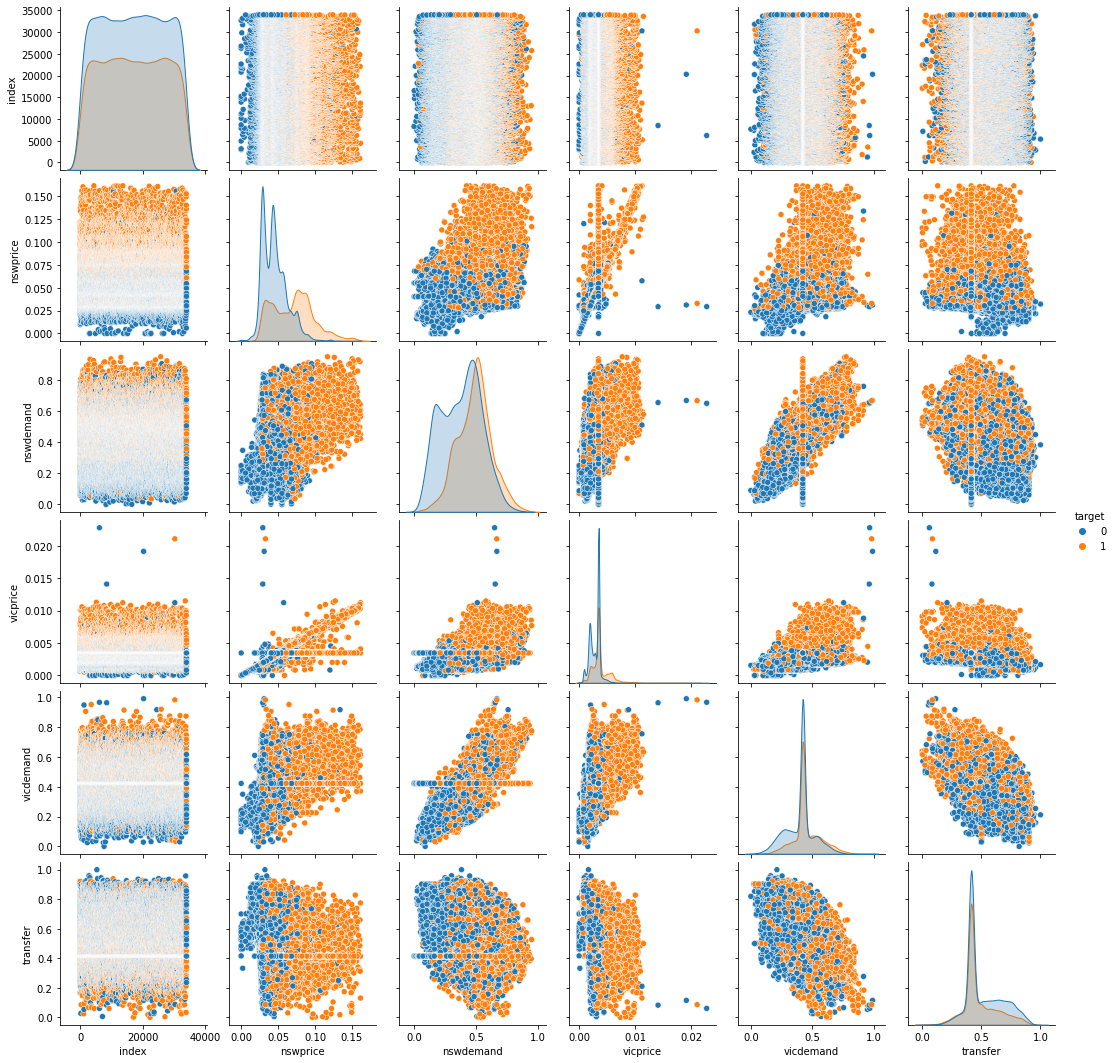

In [49]:
# Histograms below

data.hist()
plt.tight_layout()
plt.show()


sns.pairplot(data, hue='target')

# We see that the z-score method removed the worst outliers.

### Data preprocessing

In [84]:
X = data.iloc[:, :-1]
y = data.target

#### Train test split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23549, 6) (10093, 6) (23549,) (10093,)


#### Scaling

In [83]:
sc = StandardScaler()
sc.fit(X_train)


# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

# I did not use the scaled data at first, but after some testing, I ended up with a slightly better result when using the scaled data.
# Furthermore, I tried to do a grid search but it took me 4 hours and did not increase the accuracy by much
# Below I am using the relevant values I had gotten from the grid search

### Modelling

In [ ]:
forest = RandomForestClassifier(criterion='entropy',
                                max_features='auto',
                                n_estimators=250,
                                random_state=1,
                                n_jobs=-1,
                                bootstrap=True
                               )

forest.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=250,
                       n_jobs=-1, random_state=1)

### Evaluation

In [87]:
print('Forest training data accuracy: {0:.2f}'.format(forest.score(X_train_sc, y_train)))

print('Forest test data accuracy: {0:.2f}'.format(forest.score(X_test_sc, y_test)))

Forest training data accuracy: 1.00
Forest test data accuracy: 0.79


### Kaggle submission

In [81]:
pred_forest = forest.predict(X_test_sc)

score_forest = f1_score(y_test, pred_forest, average='weighted')
print(f'\nRandom Forest Score: {score_forest}\n')


Random Forest Score: 0.7949193690926537



In [82]:
forest = RandomForestClassifier(criterion='entropy',
                                max_features='auto',
                                n_estimators=250,
                                random_state=1,
                                n_jobs=-1,
                               bootstrap=True)
forest.fit(X, y)

# Predicting and inserting the results into a file named "submission_n"

submission_16 = forest.predict(test_data)
df_submission_16 = pd.DataFrame(submission_16)
df_submission_16.reset_index(level=0, inplace=True)

df_submission_16.columns = ['index', 'target']
df_submission_16.to_csv('submission_16.csv', index=False)